# Regression Model Using Keras - Assignment

### Part - 1

In [22]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [23]:
# Load dataset
dataset_path = "data/concrete_data.csv"
df = pd.read_csv(dataset_path)
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [24]:
# Separate independent & dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X.shape, y.shape

((1030, 8), (1030,))

In [29]:
def train_model(X_train, X_test, y_train, y_test):

    # Build model
    model = Sequential([
        Input((X_train.shape[1], )),
        Dense(10, activation='relu'),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit data to model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Predict 
    predictions = model.predict(X_test).flatten()

    # Error
    error = mean_squared_error(y_test, predictions)

    return model, error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model, error = train_model(X_train, X_test, y_train, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [32]:
errors = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    _, error = train_model(X_train, X_test, y_train, y_test)
    errors.append(error)
    print(f"Training: {i} completed", end='\r')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/1

In [33]:
# Mean of errors 
errors = np.array(errors)
errors.mean(), errors.std()

(283.8201222133883, 305.6942254348083)

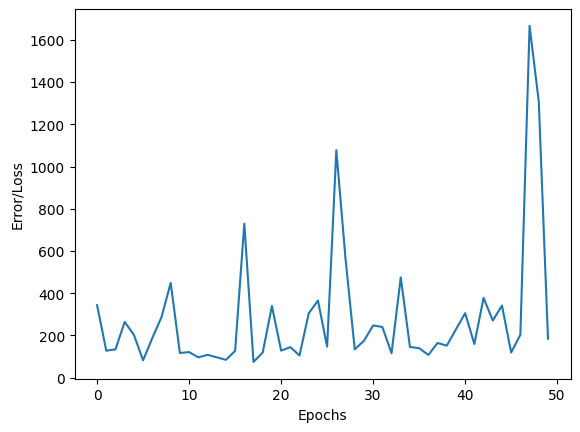

In [34]:
import matplotlib.pyplot as plt 

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error/Loss")
plt.show()

### Part - 2

In [35]:
X[:10]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


In [36]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

X = (X-np.mean(X))/np.std(X)
X[:10]

/home/vasim/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.310568,-3.463092,-4.668863,-6.402228,-49.598246,9.539218,4.708831,-4.286529
1,2.310568,-3.463092,-4.668863,-6.402228,-49.598246,9.732228,4.708831,-4.286529
2,0.324078,-1.810677,-4.668863,-3.310002,-50.016941,8.149547,3.685584,-0.453730
3,0.324078,-1.810677,-4.668863,-3.310002,-50.016941,8.149547,3.685584,1.050881
4,-0.957806,-1.927796,-4.668863,-4.996671,-50.016941,8.746591,6.574385,0.971691
5,-0.312556,-2.141160,-4.668863,-3.310002,-50.016941,8.149547,4.633959,-3.304572
6,0.778817,-2.361482,-4.668863,-3.310002,-50.016941,8.149547,3.685584,1.050881
7,0.778817,-2.361482,-4.668863,-3.310002,-50.016941,8.149547,3.685584,-4.286529
8,-0.312556,-2.141160,-4.668863,-3.310002,-50.016941,8.149547,4.633959,-4.286529
9,1.688294,-3.463092,-4.668863,-3.310002,-50.016941,8.149547,3.685584,-4.286529


In [37]:
errors = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    _, error = train_model(X_train, X_test, y_train, y_test)
    errors.append(error)
    print(f"Training: {i} completed", end='\r')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10

In [38]:
# Mean of errors 
errors = np.array(errors)
errors.mean(), errors.std()

(242.19049962199406, 24.487345965742875)

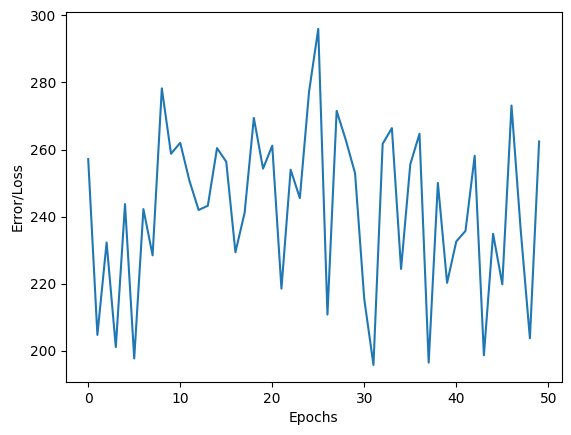

In [39]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error/Loss")
plt.show()

### Part - 3

In [40]:
def train_model(X_train, X_test, y_train, y_test, epochs=50):

    # Build model
    model = Sequential([
        Input((X_train.shape[1], )),
        Dense(10, activation='relu'),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit data to model
    model.fit(X_train, y_train, epochs=epochs, verbose=0)

    # Predict 
    predictions = model.predict(X_test).flatten()

    # Error
    error = mean_squared_error(y_test, predictions)

    return model, error

In [41]:
errors = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    _, error = train_model(X_train, X_test, y_train, y_test, epochs=100)
    errors.append(error)
    print(f"Training: {i} completed", end='\r')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [42]:
# Mean of errors 
errors = np.array(errors)
errors.mean(), errors.std()

(244.9534360307597, 253.95650243313005)

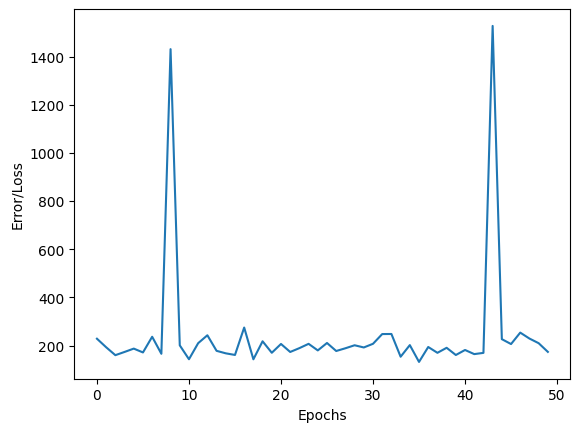

In [43]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error/Loss")
plt.show()

### Part - 4

In [44]:
def train_model(X_train, X_test, y_train, y_test, epochs=50):

    # Build model
    model = Sequential([
        Input((X_train.shape[1], )),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit data to model
    model.fit(X_train, y_train, epochs=epochs, verbose=0)

    # Predict 
    predictions = model.predict(X_test).flatten()

    # Error
    error = mean_squared_error(y_test, predictions)

    return model, error

In [45]:
errors = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    _, error = train_model(X_train, X_test, y_train, y_test, epochs=100)
    errors.append(error)
    print(f"Training: {i} completed", end='\r')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10

In [46]:
# Mean of errors 
errors = np.array(errors)
errors.mean(), errors.std()

(146.99258770649416, 165.46798014923354)

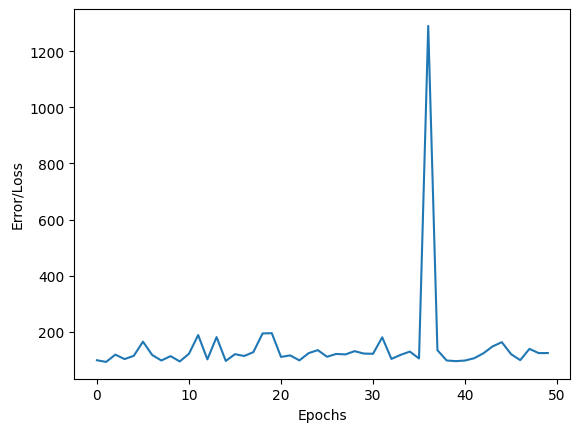

In [47]:
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error/Loss")
plt.show()